# 비지도학습 실습 - k-means Clustering

이번 튜토리얼 에서는 다음과 같은 **프로세스 파이프라인**으로 주가 예측을 진행합니다.

- Scikit-Learn의 Datasets 클래스를 활용하여 비지도학습용 데이터 구축
- Scikit-Learn의 k-means Clustering 모듈을 활용하여 모델 생성 및 클러스터링 결과 확인
- Elbow method와 silhouette score 사용하여 모델 최적화


# 1. Import Library

In [ ]:
# 필요 라이브러리 설치 및 확인 
# 데이터를 정리하기 위한 라이브러리 호출
!pip install pandas
# 데이터를 계산하기 위한 라이브러리 호출
!pip install numpy
# 데이터를 plotting하기 위한 라이브러리 2개 호출
!pip install matplotlib
!pip install seaborn
# 데이터를 분석하기 위한 라이브러리 호출
!pip install scikit-learn

In [3]:
# 필요 라이브러리 호출
# 위에서 확인한 4가지를 호출해 봅시다
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Scikit-learn에서 필요한 라이브러리들을 호출해봅시다.
# 데이터셋과 KMeans 라이브러리를 호출해 봅시다.
from sklearn import datasets
from sklearn.cluster import KMeans

# 클러스터링의 평가를 위한 라이브러리를 호출해 봅시다.
from sklearn import metrics

# 2. Data Load

- 기계학습에서 가장 기본적으로 사용되는 데이터인 iris를 사용해봅시다

In [5]:
# 데이터셋에서 iris를 호출해 봅시다.
iris = datasets.load_iris()

In [6]:
# iris 데이터 셋을 확인해 봅시다.
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [7]:
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [8]:
# 가시화를 위해 우선 두개의 피쳐만을 선택해 봅시다
X = iris.data[:, :2]

In [9]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5 # 가시화 결과에 좌우 여백을 주어 봅시다
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5 # 가시화 결과에 상하 여백을 주어 봅시다

C:\Users\donghuna\AppData\Local\Temp\ipykernel_28728\1071698877.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Set1, edgecolor="k")


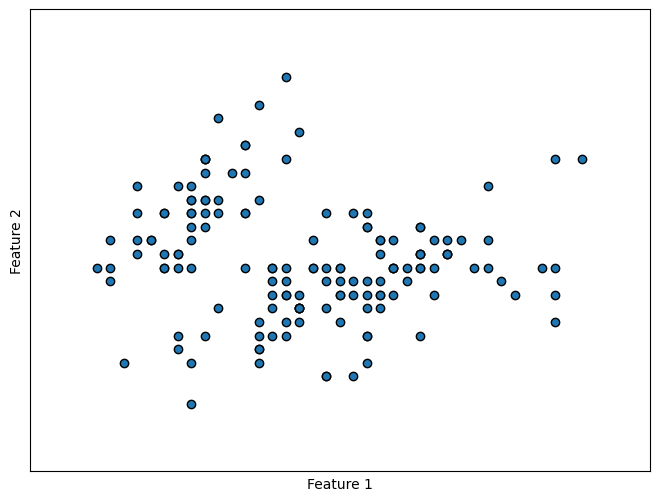

In [10]:
# (8,6)크기로 그래프를 그려봅시다
plt.figure(1, figsize=(8, 6))

# 그래프 초기화
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

#그래프 좌우/상하 길이 결정
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# 그래프 눈금은 없도록 결정
plt.xticks(())
plt.yticks(())

# 그래프 출력
plt.show()

# 3. Model Building

In [11]:
#Kmeans 모듈을 호출합니다
kmeans = KMeans(n_init='auto', n_clusters=3)

In [12]:
#Kmeans 모듈에 데이터를 입력합니다.
y_pred = kmeans.fit_predict(X)

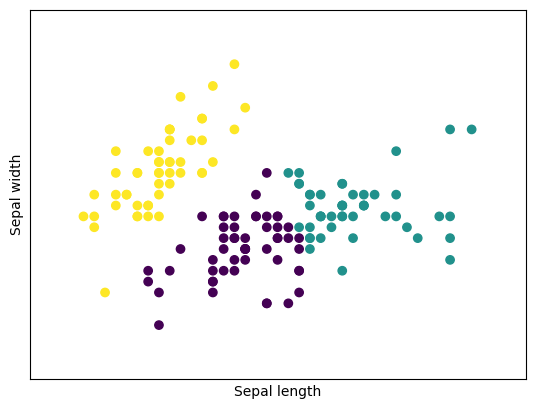

In [13]:
#입력된 결과를 그래프로 표현합니다.
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

In [14]:
# 모든 피쳐의 데이터를 선택해 봅시다
X = iris.data

Text(0.5, 1.0, 'Elbow curve')

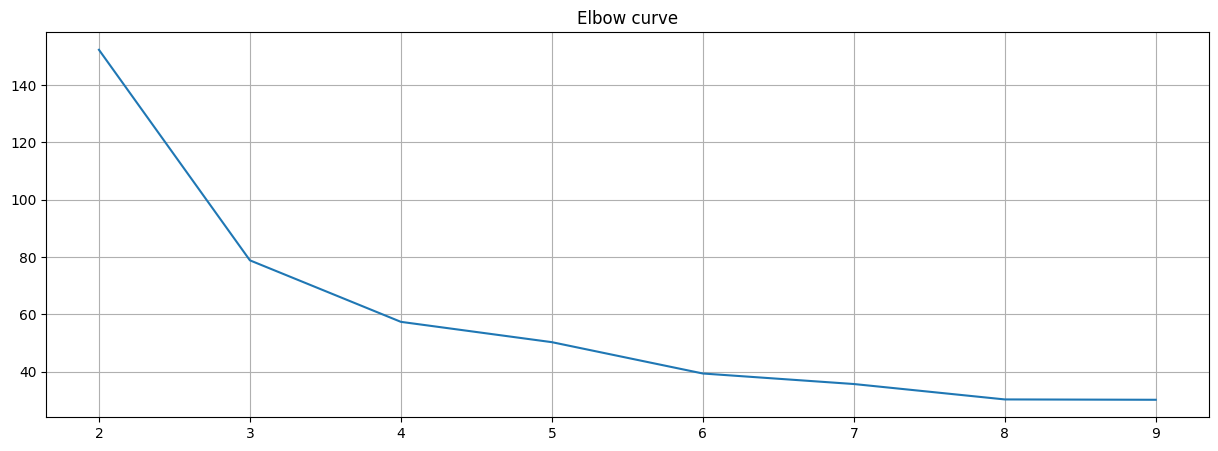

In [15]:
# 최적의 k가 3이 맞는지 확인하기 위해 elbow method를 사용
tot = []
for k in range(2, 10):
    kmeans = KMeans(n_init='auto', n_clusters=k)
    kmeans.fit(X)
    tot.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), tot)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'silhouette_score')

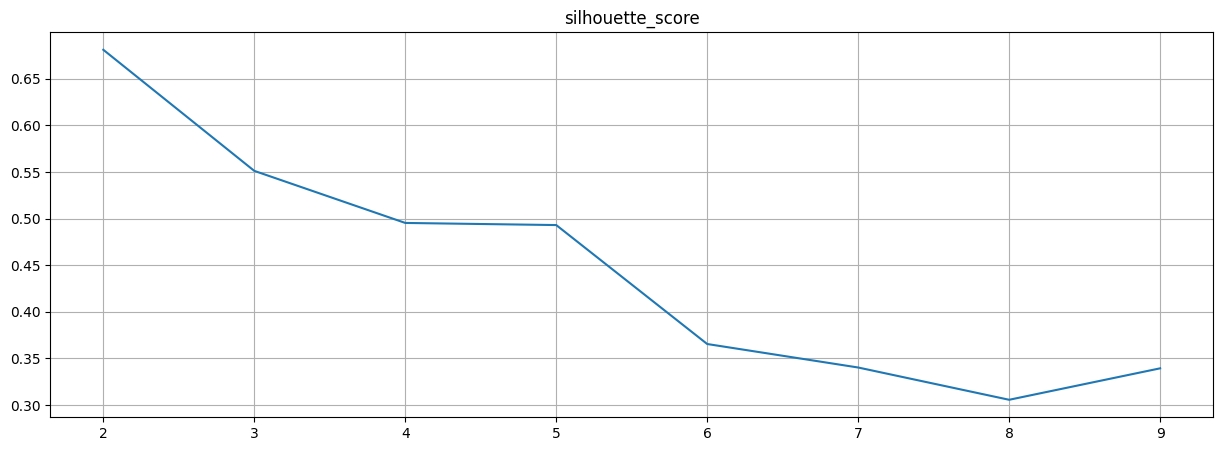

In [16]:
# 또는 silhouette_score를 사용하여 확인하기도 함
tot = []
for k in range(2, 10):
    kmeans = KMeans(n_init='auto', n_clusters=k)
    y_pred = kmeans.fit_predict(X)
    tot.append(metrics.silhouette_score(X, y_pred))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), tot)
plt.grid(True)
plt.title('silhouette_score')

In [17]:
# 가상의 데이터 군집을 만들기 위한 데이터 포인터 호출
from sklearn.datasets import make_blobs

#1500개의 가상의 데이터를 생성
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# 모든 데이터의 한쪽 분산만을 변형 (Anisotropic blobs)
X_aniso = np.dot(X, transformation)  

# 모든 데이터 포인트를 생성시 전체 분산을 변형
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance

#데이터 생성시의 사이즈를 변형
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  
y_filtered = [0] * 500 + [1] * 100 + [2] * 10


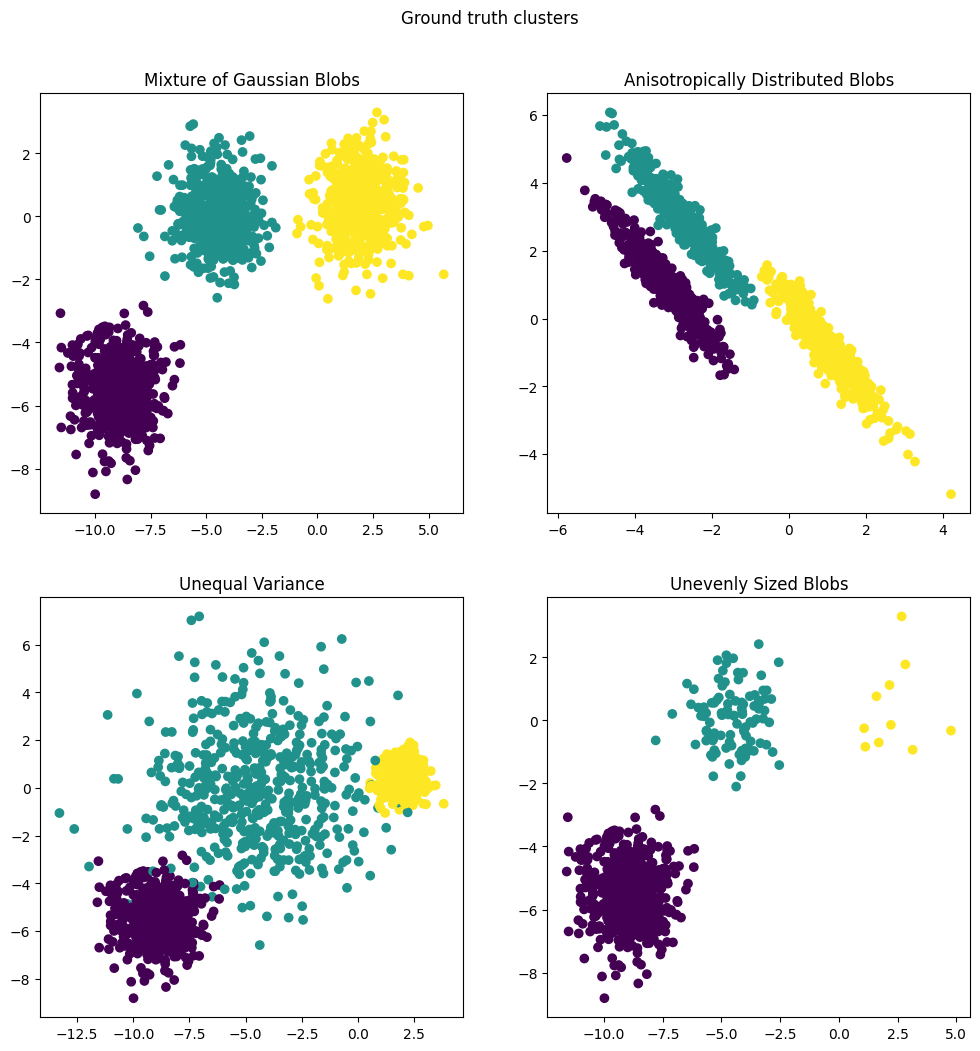

In [18]:
#앞서 생성된 데이터들의 가시화
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

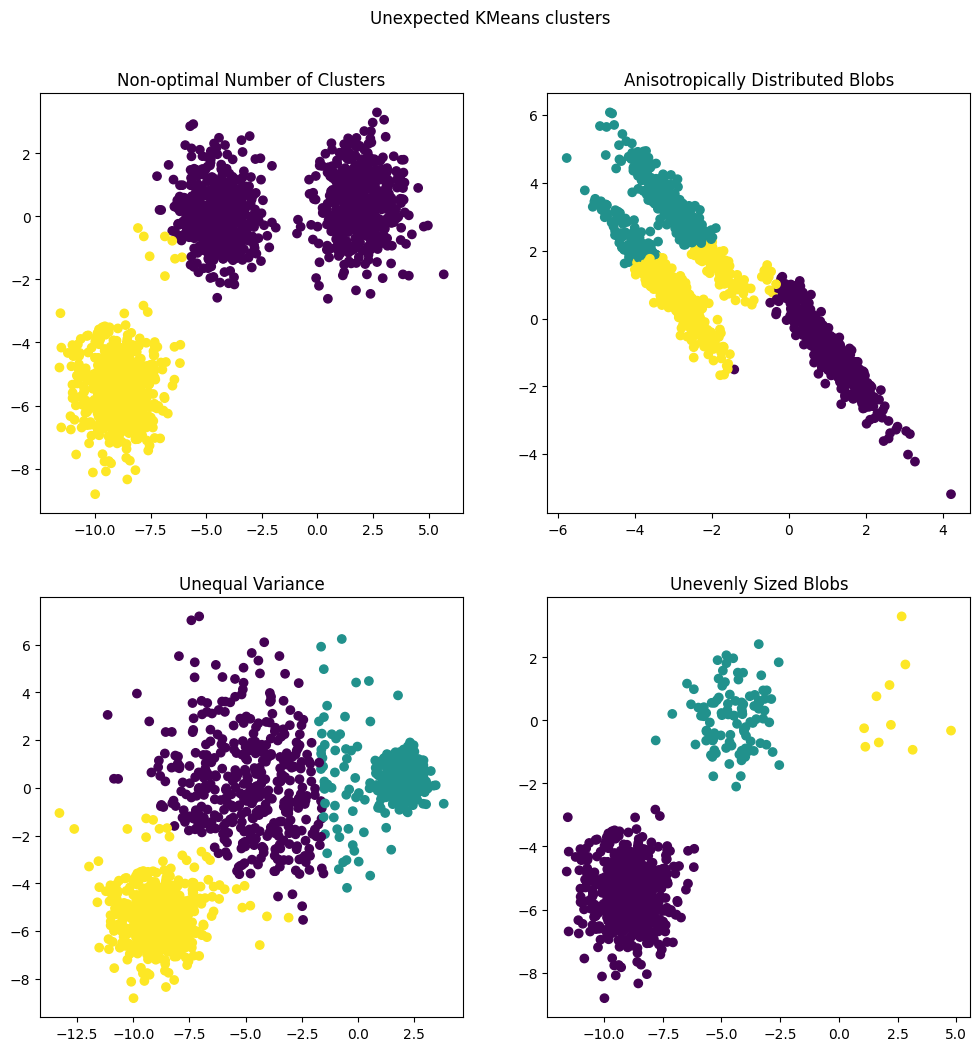

In [19]:
#4가지에 대한 가시화를 수행하여봅시다.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

#클러스터의 수가 2개라면?
y_pred = KMeans(n_init="auto", n_clusters=2).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

#나머지 3가지 경우에 대한 클러스터링 ㄱ ㅕㄹ과
y_pred = KMeans(n_init="auto", n_clusters=3).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_init="auto", n_clusters=3).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_init="auto", n_clusters=3).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

Text(0.5, 1.0, 'Elbow curve')

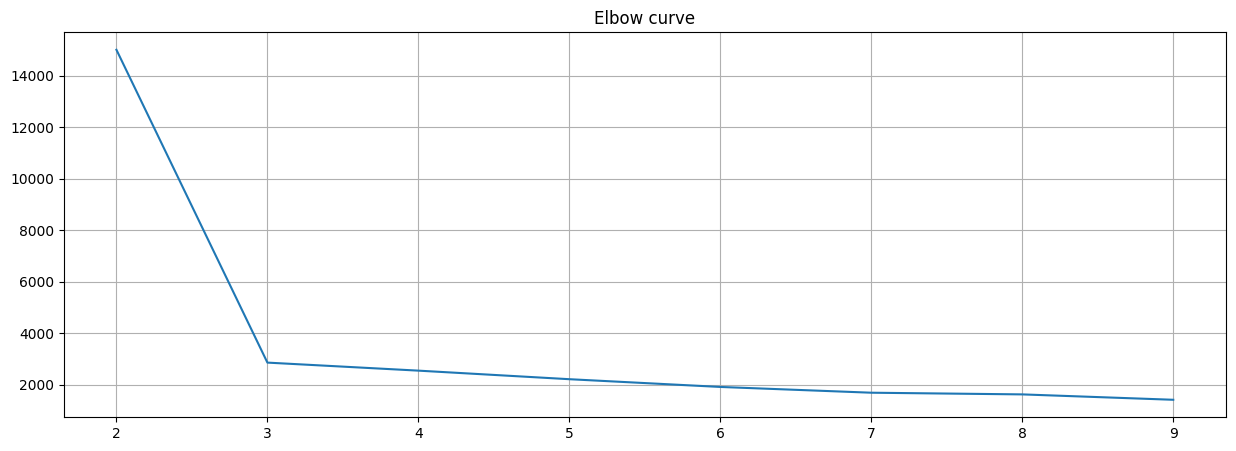

In [20]:
# 최적의 k가 3이 맞는지 확인하기 위해 elbow method를 사용
tot = []
for k in range(2, 10):
    kmeans = KMeans(n_init='auto', n_clusters=k)
    kmeans.fit(X)
    tot.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), tot)
plt.grid(True)
plt.title('Elbow curve')

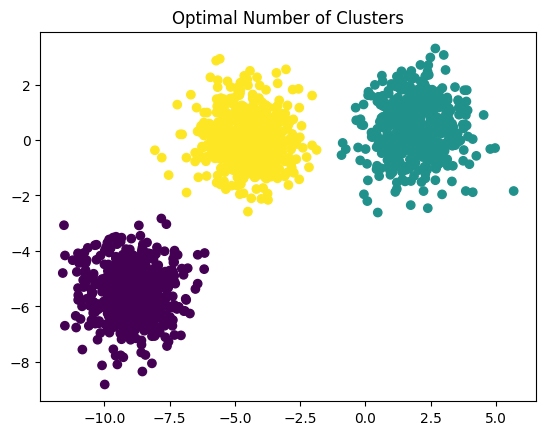

In [21]:
#최적 클러스터 갯수로 클러스터링
y_pred = KMeans(n_init='auto', n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()